In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os
import seaborn as sns
if os.name == 'nt':
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"
    
sns.set(font=font_family, rc={"axes.unicode_minus" : False })

In [4]:
CCTV_Seoul = pd.read_csv('./data/01. CCTV_in_Seoul.csv')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [5]:
df = CCTV_Seoul.copy()

In [6]:
df.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [11]:
df.columns = ['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년']
df.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [10]:
df.rename(columns={'소계':'합계',
                  '구별':'기관명'})

,기관명,합계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


In [12]:
df.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [14]:
df_cctv = df.copy()
df_cctv.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [16]:
df_pop = pd.read_excel('./data/01. population_in_Seoul.xls')
df_pop.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [19]:
df_pop = pd.read_excel('./data/01. population_in_Seoul.xls',\
                      header=2,\
                      usecols='B,D,G,J,N')
df_pop.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [20]:
df_pop.columns = ['구별','인구수','한국인','외국인','고령자']
df_pop.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [23]:
df_cctv['소계'].sort_values(ascending=False)

0     2780
18    2034
14    1930
21    1873
20    1624
6     1561
4     1496
16    1464
10    1294
8     1265
11    1091
15    1062
7     1015
22    1002
13     962
19     904
3      884
1      773
2      748
5      707
23     671
24     660
17     618
12     574
9      485
Name: 소계, dtype: int64

In [24]:
df_cctv.loc[:,'2014년':]

,2014년,2015년,2016년
0,430,584,932
1,99,155,377
2,120,138,204
3,258,184,81
4,260,390,613
5,78,53,174
6,173,246,323
7,51,269,354
8,57,451,516
9,159,42,386


In [26]:
sum = df_cctv.loc[:,'2014년':].sum(axis=1)
sum

0     1946
1      631
2      462
3      523
4     1263
5      305
6      742
7      674
8     1024
9      587
10     800
11     758
12     666
13     410
14     891
15     597
16     642
17     552
18     639
19     782
20     728
21     970
22    1155
23     610
24     407
dtype: int64

In [27]:
sum / df_cctv['2013년도 이전'] * 100

0     150.619195
1     166.490765
2     125.203252
3     134.793814
4     149.290780
5      53.228621
6      64.973730
7     100.000000
8     188.929889
9     246.638655
10     74.766355
11    139.338235
12    212.101911
13     48.578199
14     63.371266
15     81.780822
16     63.627354
17    104.347826
18     34.671731
19    157.979798
20     53.216374
21     85.237258
22    248.922414
23    147.699758
24     79.960707
dtype: float64

In [28]:
df_cctv['최근증가율'] = round((sum / df_cctv['2013년도 이전'] * 100), 2)
df_cctv.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.62
1,강동구,773,379,99,155,377,166.49
2,강북구,748,369,120,138,204,125.20
3,강서구,884,388,258,184,81,134.79
4,관악구,1496,846,260,390,613,149.29


In [29]:
df_pop.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [30]:
df_pop = df_pop[1:]
df_pop.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [31]:
df_pop.reset_index(drop=True)

,구별,인구수,한국인,외국인,고령자
0,종로구,162820.0,153589.0,9231.0,25425.0
1,중구,133240.0,124312.0,8928.0,20764.0
2,용산구,244203.0,229456.0,14747.0,36231.0
3,성동구,311244.0,303380.0,7864.0,39997.0
4,광진구,372164.0,357211.0,14953.0,42214.0
5,동대문구,369496.0,354079.0,15417.0,54173.0
6,중랑구,414503.0,409882.0,4621.0,56774.0
7,성북구,461260.0,449773.0,11487.0,64692.0
8,강북구,330192.0,326686.0,3506.0,54813.0
9,도봉구,348646.0,346629.0,2017.0,51312.0


In [32]:
df_pop = df_pop.reset_index(drop=True)

In [33]:
df_pop.head()

,구별,인구수,한국인,외국인,고령자
0,종로구,162820.0,153589.0,9231.0,25425.0
1,중구,133240.0,124312.0,8928.0,20764.0
2,용산구,244203.0,229456.0,14747.0,36231.0
3,성동구,311244.0,303380.0,7864.0,39997.0
4,광진구,372164.0,357211.0,14953.0,42214.0


In [34]:
round((df_pop['외국인'] / df_pop['인구수'] * 100), 2)

0     5.67
1     6.70
2     6.04
3     2.53
4     4.02
5     4.17
6     1.11
7     2.49
8     1.06
9     0.58
10    0.67
11    0.90
12    3.72
13    2.84
14    0.84
15    1.08
16    7.01
17    7.34
18    8.66
19    2.92
20    3.48
21    0.96
22    0.87
23    1.03
24    0.93
25     NaN
dtype: float64

In [35]:
df_pop['외국인비율'] = round((df_pop['외국인'] / df_pop['인구수'] * 100), 2)
df_pop['고령자비율'] = round((df_pop['고령자'] / df_pop['인구수'] * 100), 2)
df_pop.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,162820.0,153589.0,9231.0,25425.0,5.67,15.62
1,중구,133240.0,124312.0,8928.0,20764.0,6.70,15.58
2,용산구,244203.0,229456.0,14747.0,36231.0,6.04,14.84
3,성동구,311244.0,303380.0,7864.0,39997.0,2.53,12.85
4,광진구,372164.0,357211.0,14953.0,42214.0,4.02,11.34


In [36]:
df_pop.sort_values('인구수', ascending=False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
23,송파구,667483.0,660584.0,6899.0,72506.0,1.03,10.86
15,강서구,603772.0,597248.0,6524.0,72548.0,1.08,12.02
22,강남구,570500.0,565550.0,4950.0,63167.0,0.87,11.07
10,노원구,569384.0,565565.0,3819.0,71941.0,0.67,12.63
20,관악구,525515.0,507203.0,18312.0,68082.0,3.48,12.96
11,은평구,494388.0,489943.0,4445.0,72334.0,0.90,14.63
14,양천구,479978.0,475949.0,4029.0,52975.0,0.84,11.04
7,성북구,461260.0,449773.0,11487.0,64692.0,2.49,14.03
24,강동구,453233.0,449019.0,4214.0,54622.0,0.93,12.05
21,서초구,450310.0,445994.0,4316.0,51733.0,0.96,11.49


In [37]:
df_cctv.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.62
1,강동구,773,379,99,155,377,166.49
2,강북구,748,369,120,138,204,125.20
3,강서구,884,388,258,184,81,134.79
4,관악구,1496,846,260,390,613,149.29


In [38]:
df_cctv.sort_values('소계', ascending=False)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.62
18,양천구,2034,1843,142,30,467,34.67
14,서초구,1930,1406,157,336,398,63.37
21,은평구,1873,1138,224,278,468,85.24
20,용산구,1624,1368,218,112,398,53.22
6,구로구,1561,1142,173,246,323,64.97
4,관악구,1496,846,260,390,613,149.29
16,성북구,1464,1009,78,360,204,63.63
10,동대문구,1294,1070,23,198,579,74.77
8,노원구,1265,542,57,451,516,188.93


In [39]:
df_pop['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [40]:
len(df_pop['구별'].unique())

26

In [41]:
len(df_cctv['구별'].unique())

25

In [42]:
pd.merge(df_cctv, df_pop, on='구별', how='inner')

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07
1,강동구,773,379,99,155,377,166.49,453233.0,449019.0,4214.0,54622.0,0.93,12.05
2,강북구,748,369,120,138,204,125.20,330192.0,326686.0,3506.0,54813.0,1.06,16.60
3,강서구,884,388,258,184,81,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02
4,관악구,1496,846,260,390,613,149.29,525515.0,507203.0,18312.0,68082.0,3.48,12.96
5,광진구,707,573,78,53,174,53.23,372164.0,357211.0,14953.0,42214.0,4.02,11.34
6,구로구,1561,1142,173,246,323,64.97,447874.0,416487.0,31387.0,56833.0,7.01,12.69
7,금천구,1015,674,51,269,354,100.00,255082.0,236353.0,18729.0,32970.0,7.34,12.93
8,노원구,1265,542,57,451,516,188.93,569384.0,565565.0,3819.0,71941.0,0.67,12.63
9,도봉구,485,238,159,42,386,246.64,348646.0,346629.0,2017.0,51312.0,0.58,14.72


In [43]:
df_res = pd.merge(df_cctv, df_pop, on='구별', how='inner')
df_res.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07
1,강동구,773,379,99,155,377,166.49,453233.0,449019.0,4214.0,54622.0,0.93,12.05
2,강북구,748,369,120,138,204,125.20,330192.0,326686.0,3506.0,54813.0,1.06,16.60
3,강서구,884,388,258,184,81,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02
4,관악구,1496,846,260,390,613,149.29,525515.0,507203.0,18312.0,68082.0,3.48,12.96


In [44]:
df_res.columns

Index(['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년', '최근증가율', '인구수',
       '한국인', '외국인', '고령자', '외국인비율', '고령자비율'],
      dtype='object')

In [45]:
df_res[['구별', '소계', '최근증가율', '인구수', '한국인', '외국인', '고령자', '외국인비율', '고령자비율']]

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07
1,강동구,773,166.49,453233.0,449019.0,4214.0,54622.0,0.93,12.05
2,강북구,748,125.20,330192.0,326686.0,3506.0,54813.0,1.06,16.60
3,강서구,884,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02
4,관악구,1496,149.29,525515.0,507203.0,18312.0,68082.0,3.48,12.96
5,광진구,707,53.23,372164.0,357211.0,14953.0,42214.0,4.02,11.34
6,구로구,1561,64.97,447874.0,416487.0,31387.0,56833.0,7.01,12.69
7,금천구,1015,100.00,255082.0,236353.0,18729.0,32970.0,7.34,12.93
8,노원구,1265,188.93,569384.0,565565.0,3819.0,71941.0,0.67,12.63
9,도봉구,485,246.64,348646.0,346629.0,2017.0,51312.0,0.58,14.72


In [46]:
df_res = df_res[['구별', '소계', '최근증가율', '인구수', '한국인', '외국인', '고령자', '외국인비율', '고령자비율']]
df_res.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07
1,강동구,773,166.49,453233.0,449019.0,4214.0,54622.0,0.93,12.05
2,강북구,748,125.20,330192.0,326686.0,3506.0,54813.0,1.06,16.60
3,강서구,884,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02
4,관악구,1496,149.29,525515.0,507203.0,18312.0,68082.0,3.48,12.96


In [47]:
df_res.set_index('구별')

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07
강동구,773,166.49,453233.0,449019.0,4214.0,54622.0,0.93,12.05
강북구,748,125.20,330192.0,326686.0,3506.0,54813.0,1.06,16.60
강서구,884,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02
관악구,1496,149.29,525515.0,507203.0,18312.0,68082.0,3.48,12.96
광진구,707,53.23,372164.0,357211.0,14953.0,42214.0,4.02,11.34
구로구,1561,64.97,447874.0,416487.0,31387.0,56833.0,7.01,12.69
금천구,1015,100.00,255082.0,236353.0,18729.0,32970.0,7.34,12.93
노원구,1265,188.93,569384.0,565565.0,3819.0,71941.0,0.67,12.63


In [48]:
df_res = df_res.set_index('구별')
df_res.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07
강동구,773,166.49,453233.0,449019.0,4214.0,54622.0,0.93,12.05
강북구,748,125.20,330192.0,326686.0,3506.0,54813.0,1.06,16.60
강서구,884,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02
관악구,1496,149.29,525515.0,507203.0,18312.0,68082.0,3.48,12.96


In [49]:
df_res.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.343015,0.306342,0.304287,-0.023786,0.255196,-0.135677,-0.280777
최근증가율,-0.343015,1.000000,-0.093070,-0.082513,-0.150465,-0.070968,-0.044182,0.185264
인구수,0.306342,-0.093070,1.000000,0.998061,-0.153371,0.932667,-0.592104,-0.669621
한국인,0.304287,-0.082513,0.998061,1.000000,-0.214576,0.931636,-0.638068,-0.661002
외국인,-0.023786,-0.150465,-0.153371,-0.214576,1.000000,-0.155381,0.838794,-0.013532
고령자,0.255196,-0.070968,0.932667,0.931636,-0.155381,1.000000,-0.606343,-0.380589
외국인비율,-0.135677,-0.044182,-0.592104,-0.638068,0.838794,-0.606343,1.000000,0.267641
고령자비율,-0.280777,0.185264,-0.669621,-0.661002,-0.013532,-0.380589,0.267641,1.000000


In [51]:
np.corrcoef(df_res['고령자비율'], df_res['소계'])

array([[ 1.        , -0.28077739],
       [-0.28077739,  1.        ]])

In [52]:
np.corrcoef(df_res['인구수'], df_res['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [56]:
fp1 = np.polyfit(df_res['인구수'], df_res['소계'], 1)

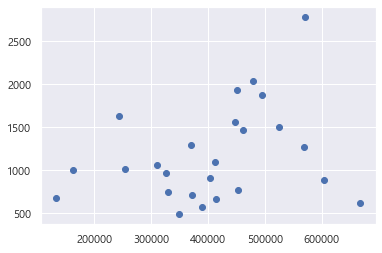

In [58]:
plt.scatter(df_res['인구수'], df_res['소계'])

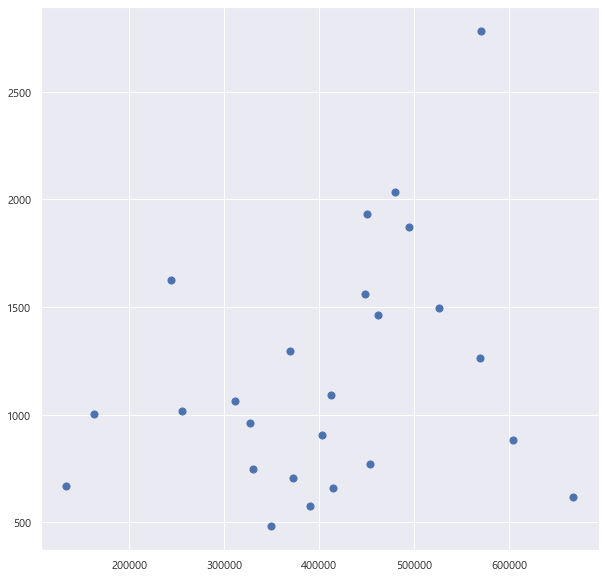

In [59]:
plt.figure(figsize=(10,10))
plt.scatter(df_res['인구수'], df_res['소계'], s=50)

In [60]:
f1 = np.poly1d(fp1)

In [62]:
a = np.array([1,2,3,4,5])
f1(a)

array([645.06780575, 645.06911491, 645.07042408, 645.07173324,
       645.07304241])

In [65]:
fx = np.linspace(0,700000,100)

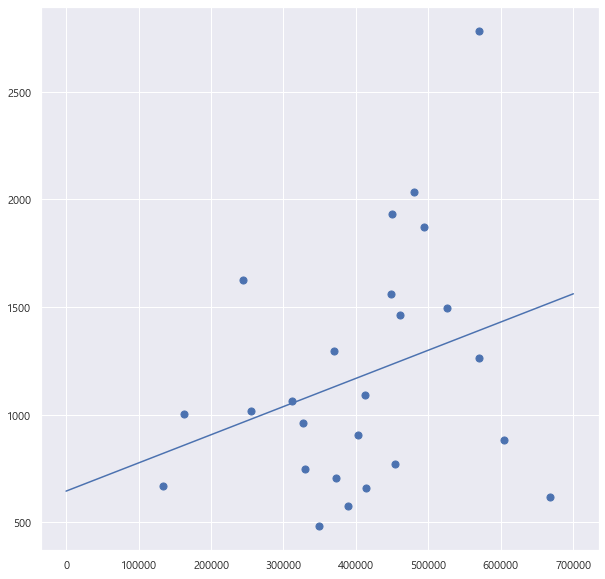

In [66]:
plt.figure(figsize=(10,10))
plt.scatter(df_res['인구수'], df_res['소계'], s=50)
plt.plot(fx, f1(fx))

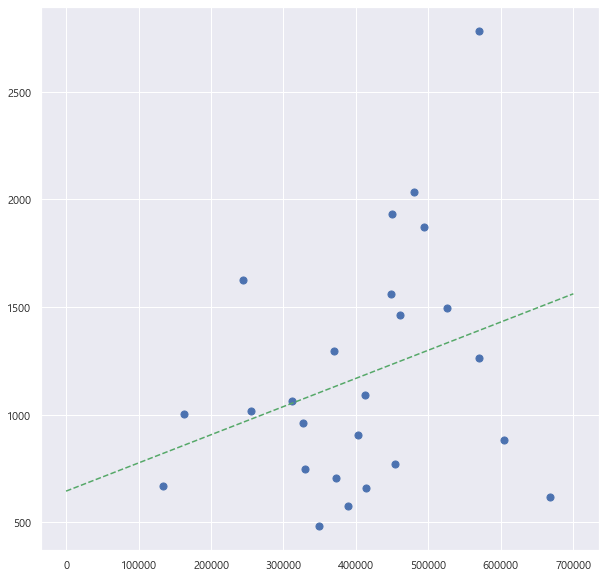

In [67]:
plt.figure(figsize=(10,10))
plt.scatter(df_res['인구수'], df_res['소계'], s=50)
plt.plot(fx, f1(fx), '--g')

In [68]:
df_res.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07
강동구,773,166.49,453233.0,449019.0,4214.0,54622.0,0.93,12.05
강북구,748,125.20,330192.0,326686.0,3506.0,54813.0,1.06,16.60
강서구,884,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02
관악구,1496,149.29,525515.0,507203.0,18312.0,68082.0,3.48,12.96


In [69]:
f1(df_res['인구수']) - df_res['소계']

구별
강남구    -1388.055355
강동구      465.422892
강북구      329.342026
강서구      551.503155
관악구     -162.948104
광진구      425.290264
구로구     -329.592918
금천구      -35.989293
노원구      125.483618
도봉구      616.501341
동대문구    -165.202586
동작구       94.122892
마포구      581.180999
서대문구     111.376568
서초구     -695.403794
성동구       -9.464016
성북구     -215.068447
송파구      900.911312
양천구     -760.563512
영등포구     268.640012
용산구     -659.231690
은평구     -580.698457
종로구     -143.775396
중구       148.499528
중랑구      527.718965
Name: 소계, dtype: float64

In [70]:
np.abs(f1(df_res['인구수']) - df_res['소계'])

구별
강남구     1388.055355
강동구      465.422892
강북구      329.342026
강서구      551.503155
관악구      162.948104
광진구      425.290264
구로구      329.592918
금천구       35.989293
노원구      125.483618
도봉구      616.501341
동대문구     165.202586
동작구       94.122892
마포구      581.180999
서대문구     111.376568
서초구      695.403794
성동구        9.464016
성북구      215.068447
송파구      900.911312
양천구      760.563512
영등포구     268.640012
용산구      659.231690
은평구      580.698457
종로구      143.775396
중구       148.499528
중랑구      527.718965
Name: 소계, dtype: float64

In [71]:
df_res['오차'] = np.abs(f1(df_res['인구수']) - df_res['소계'])
df_res.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07,1388.055355
강동구,773,166.49,453233.0,449019.0,4214.0,54622.0,0.93,12.05,465.422892
강북구,748,125.20,330192.0,326686.0,3506.0,54813.0,1.06,16.60,329.342026
강서구,884,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02,551.503155
관악구,1496,149.29,525515.0,507203.0,18312.0,68082.0,3.48,12.96,162.948104


In [72]:
df_res.sort_values('오차', ascending=False)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07,1388.055355
송파구,618,104.35,667483.0,660584.0,6899.0,72506.0,1.03,10.86,900.911312
양천구,2034,34.67,479978.0,475949.0,4029.0,52975.0,0.84,11.04,760.563512
서초구,1930,63.37,450310.0,445994.0,4316.0,51733.0,0.96,11.49,695.403794
용산구,1624,53.22,244203.0,229456.0,14747.0,36231.0,6.04,14.84,659.231690
도봉구,485,246.64,348646.0,346629.0,2017.0,51312.0,0.58,14.72,616.501341
마포구,574,212.10,389649.0,378566.0,11083.0,48765.0,2.84,12.52,581.180999
은평구,1873,85.24,494388.0,489943.0,4445.0,72334.0,0.90,14.63,580.698457
강서구,884,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02,551.503155


In [73]:
df_sort = df_res.sort_values('오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07,1388.055355
송파구,618,104.35,667483.0,660584.0,6899.0,72506.0,1.03,10.86,900.911312
양천구,2034,34.67,479978.0,475949.0,4029.0,52975.0,0.84,11.04,760.563512
서초구,1930,63.37,450310.0,445994.0,4316.0,51733.0,0.96,11.49,695.403794
용산구,1624,53.22,244203.0,229456.0,14747.0,36231.0,6.04,14.84,659.231690


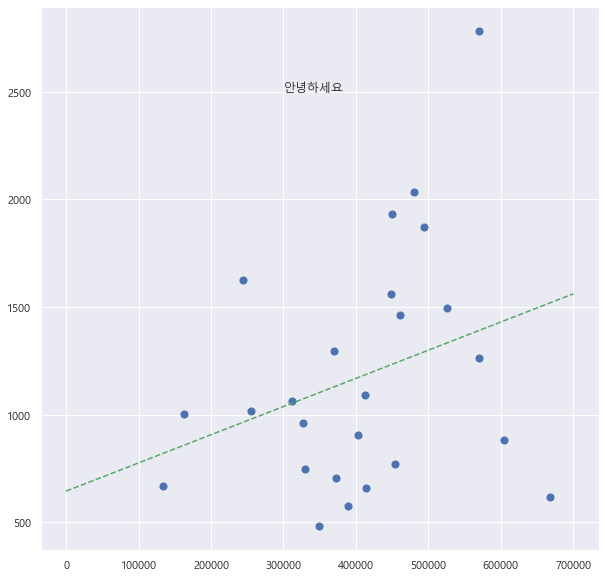

In [75]:
plt.figure(figsize=(10,10))
plt.scatter(df_res['인구수'], df_res['소계'], s=50)
plt.plot(fx, f1(fx), '--g')
plt.text(300000,2500,'안녕하세요')
plt.show()

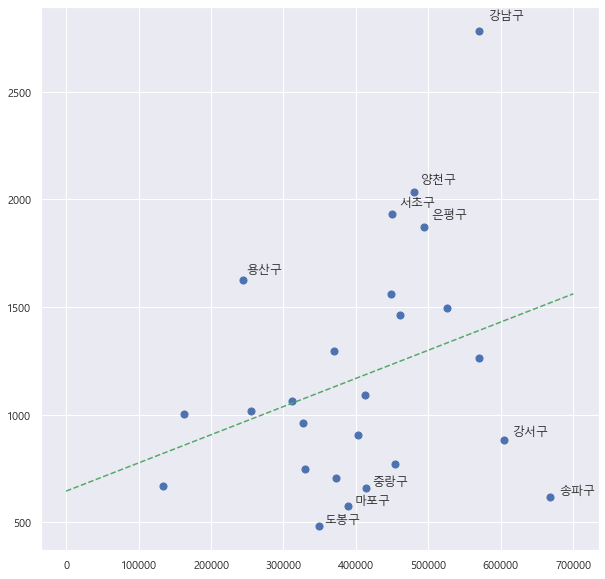

In [76]:
plt.figure(figsize=(10,10))
plt.scatter(df_res['인구수'], df_res['소계'], s=50)
plt.plot(fx, f1(fx), '--g')
for i in range(10):
    plt.text(df_sort['인구수'][i]*1.02, df_sort['소계'][i]*1.02, df_sort.index[i])
plt.show()